In [1]:
#!pip install pandas
# !pip install -r requirements.txt
#!pip install ydata-profiling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

In [33]:
dataset = pd.read_csv("data\weatherHistory.csv")
dataset

<>:1: SyntaxWarning:

invalid escape sequence '\w'

<>:1: SyntaxWarning:

invalid escape sequence '\w'

C:\Users\pghat\AppData\Local\Temp\ipykernel_25356\2214202379.py:1: SyntaxWarning:

invalid escape sequence '\w'



,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [35]:
import plotly.graph_objects as go

# Add data
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
high_2000 = [32.5, 37.6, 49.9, 53.0, 69.1, 75.4, 76.5, 76.6, 70.7, 60.6, 45.1, 29.3]
low_2000 = [13.8, 22.3, 32.5, 37.2, 49.9, 56.1, 57.7, 58.3, 51.2, 42.8, 31.6, 15.9]
high_2007 = [36.5, 26.6, 43.6, 52.3, 71.5, 81.4, 80.5, 82.2, 76.0, 67.3, 46.1, 35.0]
low_2007 = [23.6, 14.0, 27.0, 36.8, 47.6, 57.7, 58.9, 61.2, 53.3, 48.5, 31.0, 23.6]
high_2014 = [28.8, 28.5, 37.0, 56.8, 69.7, 79.7, 78.5, 77.8, 74.1, 62.6, 45.3, 39.9]
low_2014 = [12.7, 14.3, 18.6, 35.5, 49.9, 58.0, 60.0, 58.6, 51.7, 45.2, 32.2, 29.1]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=month, y=high_2014, name='High 2014',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=month, y=low_2014, name = 'Low 2014',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=month, y=high_2007, name='High 2007',
                         line=dict(color='firebrick', width=4,
                              dash='dash') # dash options include 'dash', 'dot', and 'dashdot'
))
fig.add_trace(go.Scatter(x=month, y=low_2007, name='Low 2007',
                         line = dict(color='royalblue', width=4, dash='dash')))
fig.add_trace(go.Scatter(x=month, y=high_2000, name='High 2000',
                         line = dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=month, y=low_2000, name='Low 2000',
                         line=dict(color='royalblue', width=4, dash='dot')))

# Edit the layout
fig.update_layout(
        title=dict(
            text='Average High and Low Temperatures in New York'
        ),
        xaxis=dict(
            title=dict(
                text='Month'
            )
        ),
        yaxis=dict(
            title=dict(
                text='Temperature (degrees F)'
            )
        ),
)


fig.show()

In [36]:
import csv


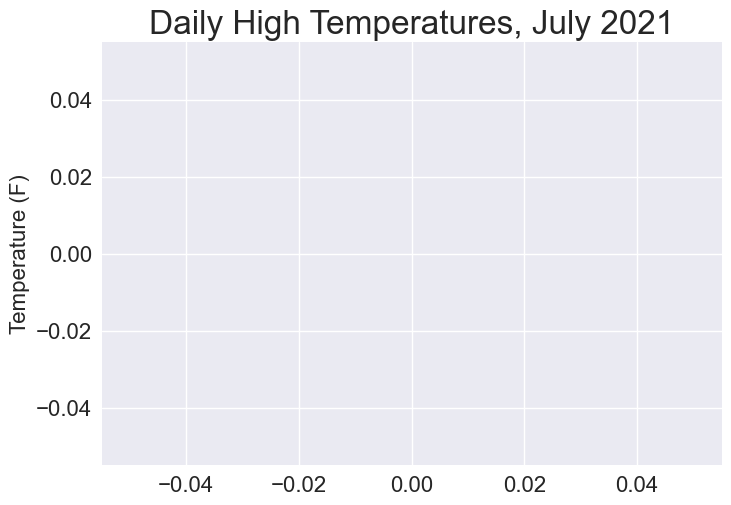

In [37]:
# Plot the high Temperatures
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(highscolor='red')

# Format plot.
ax.set_title("Daily High Temperatures, July 2021", fontsize=24)
ax.set_xlabel('',fontsize=16)
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()



In [39]:
import plotly.express as px

df = px.data.gapminder().query("country=='USA'")
fig = px.line(df, x="year", y="lifeExp", title='Life expectancy in USA')
fig.show()

In [40]:
import plotly.express as px

df = px.data.stocks()
fig = px.line(df, x='date', y="GOOG")
fig.show()

In [41]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np
np.random.seed(1)

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='lines+markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='markers', name='markers'))

fig.show()

In [44]:
import plotly.express as px

df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(df, x="year", y="lifeExp", color='country')
fig.show()